# Global Terrorism Data Analysis

The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

## Data Importing

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the data

path = r"C:\Users\rehan\Desktop\Data Analysis Projects\Terrorism Python Project\globalterrorismdb_0718dist.tar.bz2"

terrorism_data = pd.read_csv(path,compression="bz2",low_memory=False)

In [3]:
terrorism_data.head()

,Unnamed: 0,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
terrorism_data.shape

(181691, 136)

We can see that the dataset contains huge amount of data , we will select suitable columns for our analysis. Also the dataset contains terror info from 1970 - 2016 we will slice the data for a shorter timeframe.

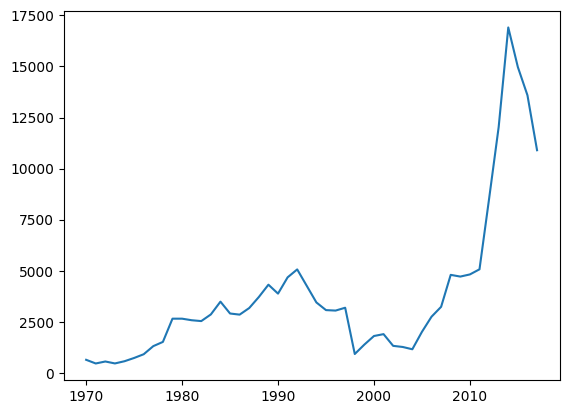

In [5]:
# let's see  worldwide terror activity since 1970
year_activity = terrorism_data.groupby('iyear')['eventid'].count().to_frame()
# yearly trend
plt.plot(year_activity)

We can see steady rise in terrorism 1970 through 1990. We will select the 1990-2017 timeframe for our analysis.

In [6]:
# selecting the columns
columns_to_keep = ['eventid','iyear','imonth','iday','country_txt',
'region_txt','success','suicide','attacktype1','attacktype1_txt','targtype1_txt',
'target1','gname', 'gsubname','nperps','weaptype1_txt','weapsubtype1_txt','nkill','nwound']

df = terrorism_data[terrorism_data['iyear'] >= 1990][columns_to_keep]

In [7]:
#setting the index 
df.set_index('eventid',drop = True,inplace = True)

In [8]:
#checking the new dataframe
df.head()

,iyear,imonth,iday,country_txt,region_txt,success,suicide,attacktype1,attacktype1_txt,targtype1_txt,target1,gname,gsubname,nperps,weaptype1_txt,weapsubtype1_txt,nkill,nwound
eventid,,,,,,,,,,,,,,,,,,
199001000001,1990,1,0,Lebanon,Middle East & North Africa,1,0,6,Hostage Taking (Kidnapping),Journalists & Media,Journalist George Hajj,Unknown,NaN,NaN,Firearms,Handgun,0.0,0.0
199001010001,1990,1,1,India,South Asia,1,0,3,Bombing/Explosion,Government (General),State Legislative Building,Unknown,NaN,NaN,Explosives,Unknown Explosive Type,0.0,0.0
199001010002,1990,1,1,India,South Asia,1,0,3,Bombing/Explosion,Business,Office Complex,Unknown,NaN,NaN,Explosives,Unknown Explosive Type,0.0,0.0
199001010003,1990,1,1,India,South Asia,1,0,3,Bombing/Explosion,Transportation,Bus,Unknown,NaN,NaN,Explosives,Unknown Explosive Type,0.0,0.0
199001010004,1990,1,1,Bolivia,South America,1,0,3,Bombing/Explosion,Religious Figures/Institutions,chapel,Alejo Calatayu,NaN,NaN,Explosives,Grenade,0.0,0.0


## Data Preparation

In [9]:
# data types of columns

df.dtypes

## which seems correct now 

iyear                 int64
imonth                int64
iday                  int64
country_txt          object
region_txt           object
success               int64
suicide               int64
attacktype1           int64
attacktype1_txt      object
targtype1_txt        object
target1              object
gname                object
gsubname             object
nperps              float64
weaptype1_txt        object
weapsubtype1_txt     object
nkill               float64
nwound              float64
dtype: object

In [10]:
# null values

df.isnull().sum()

iyear                    0
imonth                   0
iday                     0
country_txt              0
region_txt               0
success                  0
suicide                  0
attacktype1              0
attacktype1_txt          0
targtype1_txt            0
target1                258
gname                    0
gsubname            136201
nperps               36387
weaptype1_txt            0
weapsubtype1_txt     14172
nkill                 4630
nwound                8814
dtype: int64

terrorist group sub name is not of much concern to us and it has a lot of missing values we can drop the column.
however we need no of terrorists , killed and wounded information for our analysis.
so we will drop these rows containing missing data.

In [13]:
df.drop(columns = ['gsubname','attacktype1'],inplace = True)

In [14]:
df.dropna(subset=('nperps','weapsubtype1_txt','nkill','nwound'),inplace = True)

In [15]:
df.target1.fillna('Unknown',inplace= True)

In [16]:
df.isna().sum()

iyear               0
imonth              0
iday                0
country_txt         0
region_txt          0
success             0
suicide             0
attacktype1_txt     0
targtype1_txt       0
target1             0
gname               0
nperps              0
weaptype1_txt       0
weapsubtype1_txt    0
nkill               0
nwound              0
dtype: int64

In [17]:
# null values are dealt with we will give better name to columns

df.rename(columns = {'iyear':'year','imonth':'month','iday':'day','country_txt':'country','region_txt':'region','attacktype1_txt':'attacktype','targtype1_txt':'targetype','target1':'target','weaptype1_txt':'weapontype','weapsubtype1_txt':'weaponsubtype'},inplace = True)

In [18]:
df.head()

,year,month,day,country,region,success,suicide,attacktype,targetype,target,gname,nperps,weapontype,weaponsubtype,nkill,nwound
eventid,,,,,,,,,,,,,,,,
199001040001,1990,1,4,Peru,South America,1,0,Armed Assault,Police,station,Shining Path (SL),10.0,Firearms,Automatic or Semi-Automatic Rifle,3.0,1.0
199001050004,1990,1,5,Colombia,South America,1,0,Assassination,Government (General),"Roberto Lozano Suarez, Land Reform Advisor to ...",Unknown,1.0,Firearms,Handgun,1.0,0.0
199001050007,1990,1,5,Philippines,Southeast Asia,1,0,Assassination,Government (General),Mayor Javier Hizon,New People's Army (NPA),2.0,Firearms,Handgun,2.0,0.0
199001060013,1990,1,6,Colombia,South America,1,0,Bombing/Explosion,Business,building,Unknown,2.0,Explosives,Unknown Explosive Type,0.0,3.0
199001080008,1990,1,8,Peru,South America,1,0,Assassination,Police,Sgt Jose Zuniga Revilla,Shining Path (SL),4.0,Firearms,Handgun,2.0,0.0


Now our data is prepared and ready for analysis

# Exploratory Data Analysis

In [19]:
##distribution of number of terrorists , casualties and wounded
df[['nperps','nkill','nwound']].describe()

,nperps,nkill,nwound
count,89886.000000,89886.000000,89886.000000
mean,-73.717431,2.015720,3.438989
std,55.199759,7.205028,14.269968
min,-99.000000,0.000000,0.000000
25%,-99.000000,0.000000,0.000000
50%,-99.000000,1.000000,0.000000
75%,-99.000000,2.000000,3.000000
max,3000.000000,670.000000,1500.000000


In [20]:
df.nperps.value_counts()

-99.0      69549
 1.0        7209
 2.0        4661
 3.0        1839
 4.0        1454
           ...  
 230.0         1
 190.0         1
 204.0         1
 1200.0        1
 41.0          1
Name: nperps, Length: 86, dtype: int64

In [21]:
#this -99 must have been used for unknown terrorist count 
#will replace this with 0 since dropping these will lead to large loss of data///
df.nperps.replace(-99.0,0,inplace = True)

In [22]:
df[['nperps','nkill','nwound']].describe()

,nperps,nkill,nwound
count,89886.000000,89886.000000,89886.000000
mean,2.883497,2.015720,3.438989
std,29.823524,7.205028,14.269968
min,-9.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000
75%,0.000000,2.000000,3.000000
max,3000.000000,670.000000,1500.000000


In [23]:
## there are still negative values in nperps
df[df.nperps <0 ]

,year,month,day,country,region,success,suicide,attacktype,targetype,target,gname,nperps,weapontype,weaponsubtype,nkill,nwound
eventid,,,,,,,,,,,,,,,,
201005160019,2010,5,16,Iraq,Middle East & North Africa,1,0,Bombing/Explosion,Government (General),A Regional Government (KRG) official was targe...,Unknown,-9.0,Explosives,Other Explosive Type,0.0,0.0


In [24]:
df.nperps.replace(-9.0,0,inplace = True)
df[['nperps','nkill','nwound']].describe()

,nperps,nkill,nwound
count,89886.000000,89886.000000,89886.000000
mean,2.883597,2.015720,3.438989
std,29.823499,7.205028,14.269968
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000
75%,0.000000,2.000000,3.000000
max,3000.000000,670.000000,1500.000000


In [25]:
df.country.nunique()

175

In [26]:
df.region.nunique()

12

We have data from 175 countries across 12 regions

Text(0.5, 1.0, 'Number of attacks by Year')

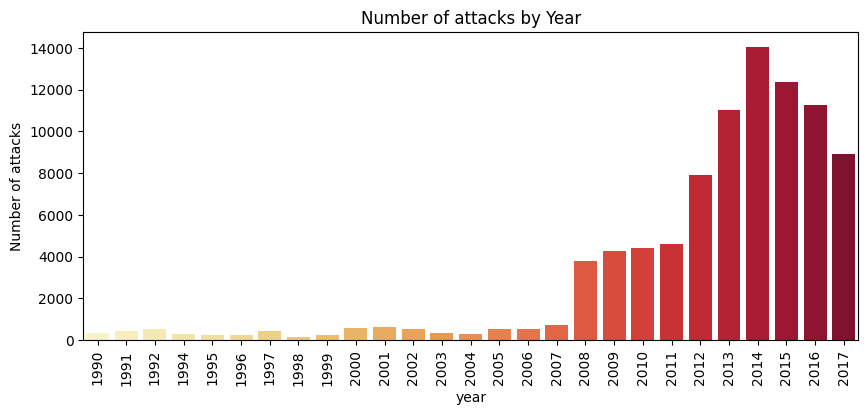

In [49]:
# attacks by year

plt.figure(figsize=(10,4))
sns.countplot(x='year',data =df,palette='YlOrRd')
plt.xticks(rotation=90)
plt.ylabel('Number of attacks')
plt.title('Number of attacks by Year')

Text(0.5, 1.0, 'Attacks by Region')

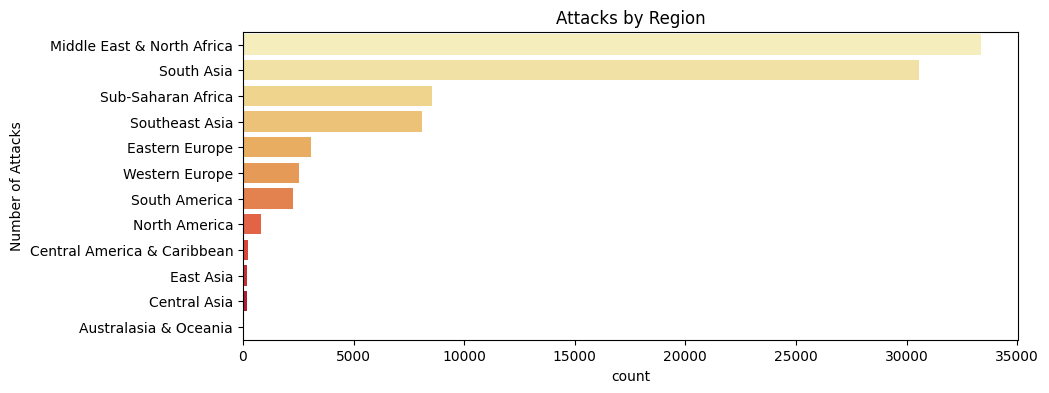

In [63]:
# attacks by region

plt.figure(figsize = (10,4))
sns.countplot(y ='region', data = df , palette = 'YlOrRd',order = df.region.value_counts().index)
plt.ylabel('Number of Attacks')
plt.title('Attacks by Region')

Text(0.5, 1.0, 'Attacks by country')

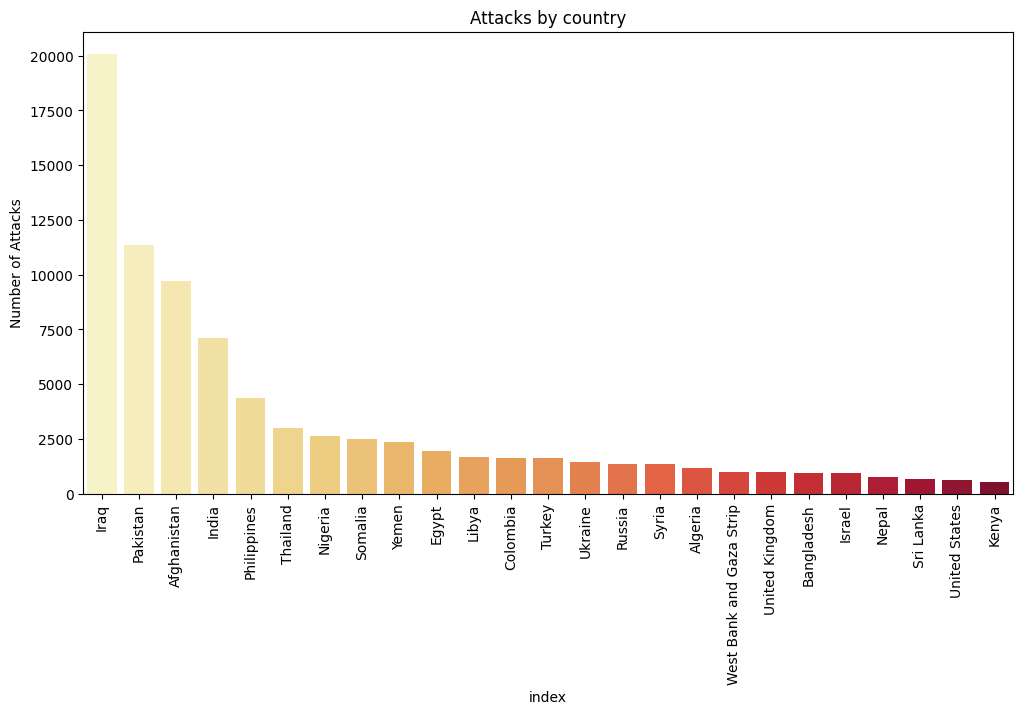

In [89]:
#countries most affected by attacks top 25

most_affected_countries = df['country'].value_counts().nlargest(25).to_frame().reset_index()

plt.figure(figsize = (12,6))
sns.barplot(x='index',y='country',data = most_affected_countries ,palette = 'YlOrRd')
plt.xticks(rotation = 90)
plt.ylabel('Number of Attacks')
plt.title('Attacks by country')


In [132]:
# number of incidents and casualties by year

casualties = df.groupby('year').agg({'year':'count','nkill':'sum','nwound':'sum'})

casualties = casualties.rename(columns = {'year':'Total attacks','nkill':'Total killed','nwound':'Total injured'}).reset_index()

casualties.head()

,year,Total attacks,Total killed,Total injured
0,1990,332,910.0,447.0
1,1991,438,1167.0,476.0
2,1992,560,1226.0,1002.0
3,1994,300,649.0,760.0
4,1995,264,1006.0,1630.0


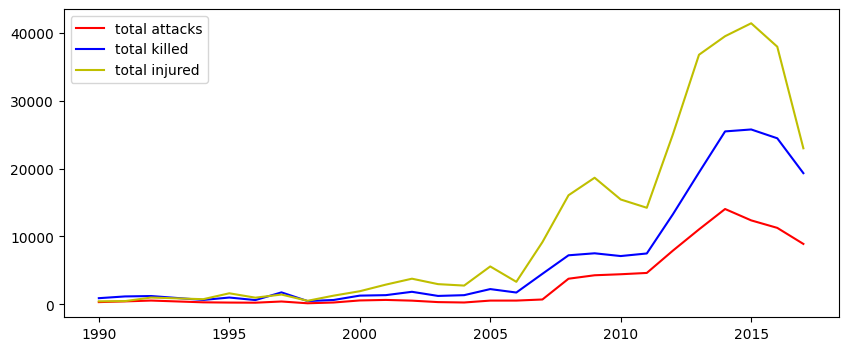

In [145]:
#plotting trends of attacks ,deaths and wounded

plt.figure(figsize = (10,4))
plt.plot('year','Total attacks',data = casualties,color='r',label='total attacks')
plt.plot('year','Total killed',data = casualties,color='b',label='total killed')
plt.plot('year','Total injured',data = casualties,color='y',label='total injured')
plt.legend()


In [147]:
#most targeted installations

df.targetype.value_counts()

Private Citizens & Property       23454
Military                          13863
Police                            13697
Government (General)              10058
Business                           7638
Unknown                            4945
Religious Figures/Institutions     2583
Transportation                     2534
Educational Institution            2466
Utilities                          1912
Terrorists/Non-State Militia       1886
Journalists & Media                1063
Government (Diplomatic)            1009
Violent Political Party             989
Telecommunication                   492
NGO                                 432
Airports & Aircraft                 311
Tourists                            128
Food or Water Supply                120
Abortion Related                    112
Maritime                            104
Other                                90
Name: targetype, dtype: int64

In [148]:
df.weapontype.value_counts()

Explosives      54867
Firearms        28244
Incendiary       4581
Melee            2086
Chemical          107
Radiological        1
Name: weapontype, dtype: int64

In [149]:
df.attacktype.value_counts()

Bombing/Explosion                      51320
Armed Assault                          22628
Assassination                           6980
Facility/Infrastructure Attack          4680
Hostage Taking (Kidnapping)             3341
Unarmed Assault                          346
Hostage Taking (Barricade Incident)      325
Hijacking                                259
Unknown                                    7
Name: attacktype, dtype: int64

In [153]:
# most voilent groups

df.gname.value_counts()

Unknown                                        49645
Taliban                                         5339
Islamic State of Iraq and the Levant (ISIL)     4043
Al-Shabaab                                      2098
Boko Haram                                      1654
                                               ...  
Zuwar al-Imam Rida                                 1
Four Martyrs Brigade                               1
Aisha Umm-al Mouemeneen (Brigades of Aisha)        1
Chukakuha Revolutionary Army                       1
Anarchist Action (CA / United States)              1
Name: gname, Length: 1386, dtype: int64

# Exporting the Data

In [154]:
filepath = r"C:\Users\rehan\Desktop\Data Analysis Projects\Terrorism Python Project\globalterrorism.csv"
df.to_csv(filepath)